Name: Ragendrta Maharjan

UNI ID: 2329812


In [ ]:
Step 1: Set Up and Import Libraries

In [14]:
# !pip install tensorflow pillow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image


Step 2: Mount Google Drive and Set Dataset Paths

In [4]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/MyDrive/AI&ML/DevanagariHandwrittenDigitDataset/Train'
test_dir = '/content/drive/MyDrive/AI&ML/DevanagariHandwrittenDigitDataset/Test'

# Image dimensions
img_height, img_width = 28, 28


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Step 3: Load and Preprocess the Dataset

In [12]:
# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}  # e.g., {"digit_0": 0, ..., "digit_9": 9}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Grayscale
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load the images
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape for Keras (samples, height, width, channels)
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Confirm shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (0, 28, 28, 1), y_train shape: (0, 10)
x_test shape: (1830, 28, 28, 1), y_test shape: (1830, 10)


Step 4: Visualize Sample Images

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


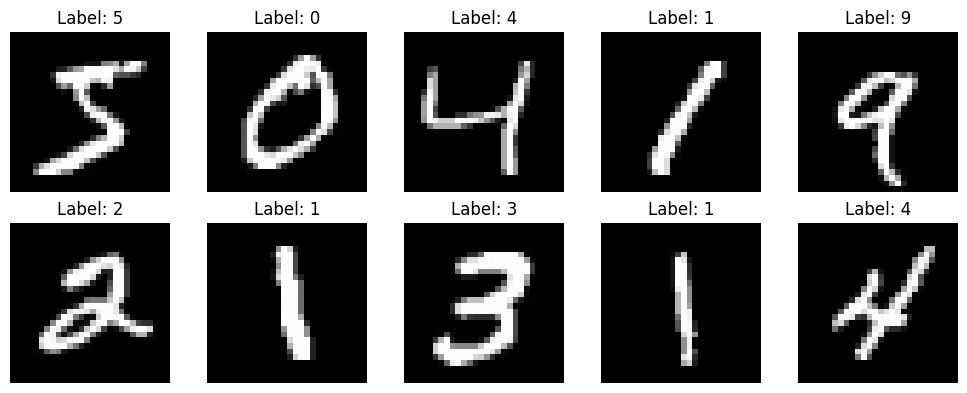

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot first 10 images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')  # No need to reshape
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Step 5: Build the Fully Connected Neural Network (FCN)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

# Define the model architecture
model = Sequential([
    Input(shape=(28, 28, 1)),         # Input layer
    Flatten(),                        # Flatten image to 1D
    Dense(64, activation="sigmoid"), # 1st hidden layer
    Dense(128, activation="sigmoid"),# 2nd hidden layer
    Dense(256, activation="sigmoid"),# 3rd hidden layer
    Dense(10, activation="softmax")  # Output layer for 10 classes
])

# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Step 6: Compile the Model

In [17]:
# Compile the model
model.compile(
    optimizer='adam',                     # Optimizer
    loss='categorical_crossentropy',      # Loss function for one-hot labels
    metrics=['accuracy']                  # Track accuracy
)

 Step 7: Train the Model with Callbacks and Validation Split

In [19]:
from tensorflow.keras.utils import to_categorical

# Convert labels if needed
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Compile the model with correct loss function
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
    ]
)


Epoch 1/20
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4975 - loss: 1.5714

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4986 - loss: 1.5685 - val_accuracy: 0.8643 - val_loss: 0.4799
Epoch 2/20
365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8680 - loss: 0.4481

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8682 - loss: 0.4473 - val_accuracy: 0.8857 - val_loss: 0.3713
Epoch 3/20
365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8874 - loss: 0.3779

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8873 - loss: 0.3776 - val_accuracy: 0.9059 - val_loss: 0.3129
Epoch 4/20
371/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8961 - loss: 0.3433

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8961 - loss: 0.3433 - val_accuracy: 0.9091 - val_loss: 0.2998
Epoch 5/20
367/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9029 - loss: 0.3122

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9029 - loss: 0.3121 - val_accuracy: 0.9098 - val_loss: 0.2957
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9042 - loss: 0.3112

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9042 - loss: 0.3112 - val_accuracy: 0.9123 - val_loss: 0.2912
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9137 - loss: 0.2891

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9137 - loss: 0.2891 - val_accuracy: 0.9193 - val_loss: 0.2697
Epoch 8/20
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9044 - loss: 0.3082

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9044 - loss: 0.3080 - val_accuracy: 0.9256 - val_loss: 0.2502
Epoch 9/20
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9186 - loss: 0.2675

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9186 - loss: 0.2674 - val_accuracy: 0.9210 - val_loss: 0.2455
Epoch 10/20
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9211 - loss: 0.2615

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9211 - loss: 0.2615 - val_accuracy: 0.9290 - val_loss: 0.2389
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9221 - loss: 0.2543 - val_accuracy: 0.9255 - val_loss: 0.2497
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9204 - loss: 0.2587 - val_accuracy: 0.9283 - val_loss: 0.2452
Epoch 13/20
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9211 - loss: 0.2530

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9212 - loss: 0.2529 - val_accuracy: 0.9271 - val_loss: 0.2337
Epoch 14/20
369/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9274 - loss: 0.2338

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9274 - loss: 0.2339 - val_accuracy: 0.9296 - val_loss: 0.2317
Epoch 15/20
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9275 - loss: 0.2346

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9275 - loss: 0.2345 - val_accuracy: 0.9302 - val_loss: 0.2285
Epoch 16/20
365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9301 - loss: 0.2276

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9301 - loss: 0.2275 - val_accuracy: 0.9336 - val_loss: 0.2260
Epoch 17/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9332 - loss: 0.2138 - val_accuracy: 0.9292 - val_loss: 0.2277
Epoch 18/20
372/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9329 - loss: 0.2115

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9329 - loss: 0.2115 - val_accuracy: 0.9327 - val_loss: 0.2157
Epoch 19/20
367/375 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9330 - loss: 0.2116

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9330 - loss: 0.2118 - val_accuracy: 0.9360 - val_loss: 0.2110
Epoch 20/20
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9306 - loss: 0.2219

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9306 - loss: 0.2219 - val_accuracy: 0.9385 - val_loss: 0.2081


Step 8: Visualize Training and Validation Performance

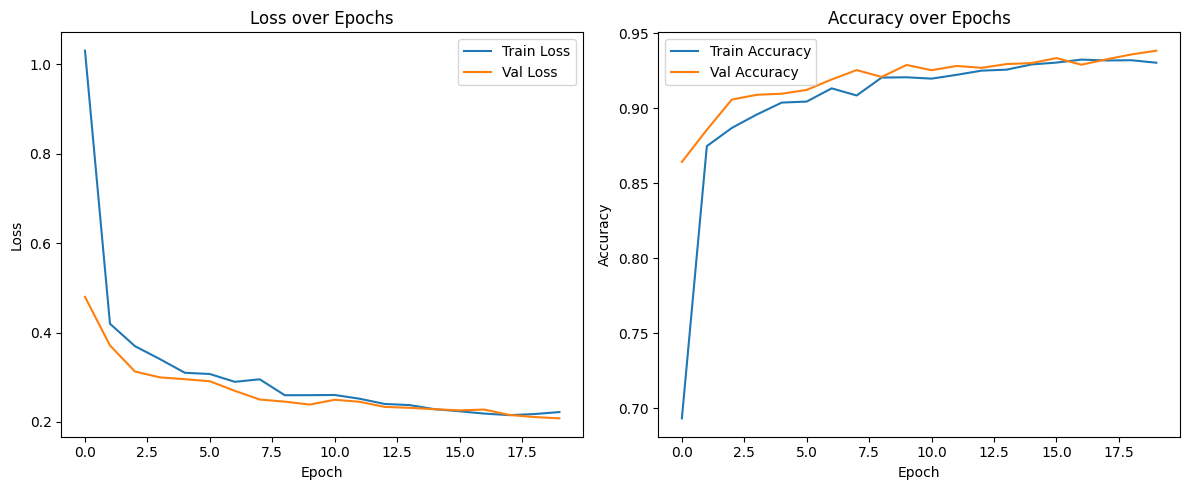

In [20]:
# Plot training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

Step 9: Evaluate the Model on the Test Set

In [21]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9337 - loss: 0.2122
Test accuracy: 0.9337


Step 10: Save and Load the Model

In [22]:
# Save the model
model.save("devnagari_fcn_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [23]:
# Load the model
loaded_model = tf.keras.models.load_model("devnagari_fcn_model.h5")

# Re-evaluate the loaded model
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded model test accuracy: {acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.9337 - loss: 0.2122
Loaded model test accuracy: 0.9337


 Step 11: Make Predictions

In [24]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print the first 5 predictions vs true labels
for i in range(5):
    print(f"Image {i+1}: Predicted = {predicted_labels[i]}, True = {true_labels[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Image 1: Predicted = 7, True = 7
Image 2: Predicted = 2, True = 2
Image 3: Predicted = 1, True = 1
Image 4: Predicted = 0, True = 0
Image 5: Predicted = 4, True = 4


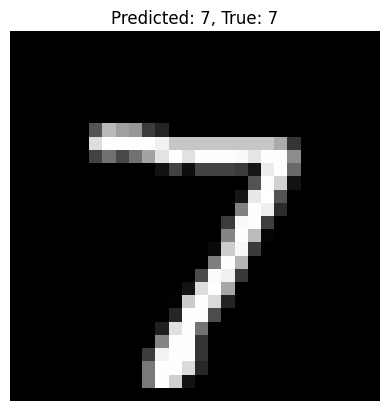

In [25]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_labels[0]}, True: {true_labels[0]}")
plt.axis("off")
plt.show()